<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 1 </h3> <br/>Import all necessary <code>packages</code> and get first look at you <code>dataset</code> 
    <br/> <span style="color:#00a0e5">(Ваша задача - подключить все необходимые пакеты и получить представление о данных) </span>
    <br/>
    Use <code>head()</code>, <code>shape</code>, <code>info()</code> and <code>describe()</code> functions
        </span>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 2 </h3> <br/>Simple random sampling -  write a function (don't use a any module from scikit-learn or stats packages) that creates a random sample from you <code>dataset</code>
    <br/> <span style="color:#00a0e5">(Напишите функцию, которая создает случайные выборки из вашего набора данных) </span>
    </span>

In [4]:
df = pd.read_csv('data/student-portug.csv', index_col='IDs')

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
IDs,,,,,,,,,,,,,,,,,,,,,
0,GP,F,6574.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3.0,4,0,11,11
1,GP,F,62049.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3.0,2,9,11,11
2,GP,F,NaN,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3.0,6,12,13,12
3,GP,F,5479.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5.0,0,14,14,14
4,GP,F,5844.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5.0,0,11,13,13


In [6]:
def random_sampling(data, n):
    ids = np.arange(data.shape[0])
    np.random.shuffle(ids)
    return data.iloc[ids[:n],:]

In [7]:
random_sampling(df, 10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
IDs,,,,,,,,,,,,,,,,,,,,,
129,GP,M,5844.0,U,GT3,T,2,3,other,other,...,3,2,3,2,2,1.0,4,13,12,13
532,MS,M,5844.0,U,GT3,T,2,1,health,services,...,4,2,2,1,4,5.0,2,9,7,8
382,GP,F,NaN,U,GT3,T,3,3,at_home,other,...,4,2,5,2,5,5.0,2,11,12,11
480,MS,F,6940.0,U,GT3,T,2,3,at_home,services,...,4,4,4,1,1,2.0,0,9,9,10
177,GP,M,5844.0,U,GT3,T,1,3,at_home,services,...,5,3,3,1,4,2.0,2,9,8,8
44,GP,F,5844.0,U,LE3,T,2,2,other,at_home,...,4,3,3,2,2,5.0,14,10,11,11
240,GP,F,6209.0,U,GT3,T,3,2,other,other,...,5,3,4,1,3,3.0,2,17,18,17
69,GP,F,5479.0,R,LE3,T,3,1,other,other,...,4,4,2,2,3,3.0,6,15,15,15
431,MS,F,6209.0,R,GT3,T,3,2,at_home,other,...,4,5,4,1,2,5.0,0,10,10,10


<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 3 </h3> <br/>Stratified sampling -  write a function (don't use a any module from scikit-learn or stats packages) that creates a stratified sample from you <code>dataset</code>
    <br/> <span style="color:#00a0e5">(Стратифицированная выборка - напишите функцию, которая создает стратифицированные выборки из вашего набора данных ) </span>
    </span>

In [8]:
def stratified_sampling(data, p, n):
    props = data[p].value_counts(normalize=True)
    tot = pd.DataFrame(columns=[data.columns])
    for i, j in data.groupby(p):
        tot = np.vstack((tot, random_sampling(j, int(n*props[i]))))
    return random_sampling(pd.DataFrame(data=tot, columns=[data.columns]), tot.shape[0])

In [9]:
stratified_sampling(df, 'sex', 10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
3,GP,F,NaN,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,2,14,14,14
8,MS,M,6209,R,LE3,T,1,3,other,other,...,5,1,2,3,3,5,2,12,11,12
1,GP,F,5844,U,GT3,T,3,3,other,services,...,4,3,3,2,4,5,4,11,11,11
4,GP,F,6209,U,GT3,T,4,3,other,other,...,3,4,5,2,4,1,16,11,9,10
7,GP,M,5844,U,GT3,T,4,4,services,services,...,5,3,3,1,3,5,0,15,13,13
6,GP,M,5479,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
0,MS,F,6940,U,GT3,T,2,3,at_home,services,...,4,4,4,1,1,2,0,9,9,10
2,GP,F,5844,U,GT3,T,4,4,health,health,...,4,4,2,1,1,3,0,16,16,17
5,GP,M,5844,R,GT3,A,4,4,other,teacher,...,2,4,3,1,1,5,4,13,13,13


<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 4.1 </h3> <br/>Estimation - Use any data column from dataset, compute mean and std - simulate this experiment(yu can use SimulateSamplee function) 1000 times and plot the sampling distribution of the estimate, calculate mean and std. 
    <br/> <span style="color:#00a0e5">() </span>
    </span>

In [10]:
# here mu-population mean, sigma-population std, n-sample size, m-samples amount
def SimulateSamplee(mu, sigma, n, m):
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        means.append(np.mean(xs))
    return means

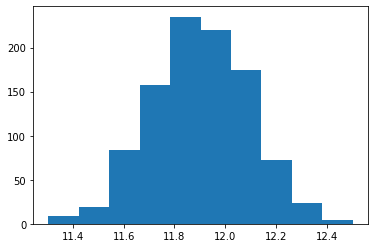

In [11]:
plt.hist(SimulateSamplee(df['G3'].mean(), df['G3'].std(), 300, 1000));

<span style="color:#011f4b; font-size:15px; ">
 <h3>TASK 4.2 </h3> <br/>Estimation - Use previous data column from dataset, compute mean and std - randomly sample from data 1000 times and plot the sampling distribution of the estimate, calculate mean and std. Compare with Task 4.1
    <br/> <span style="color:#00a0e5"> </span>
    </span>

In [12]:
def samplee(data, n, m):
    means = []
    for j in range(m):
        means.append(random_sampling(data, n)['G3'].mean())
    return means

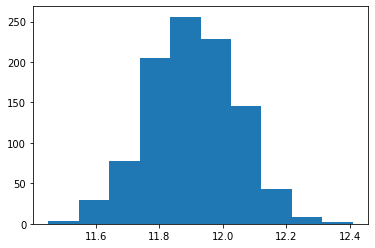

In [13]:
plt.hist(samplee(df, 300, 1000));